

---



# Project for Machine Learning I course.
## Understanding the Performance of Simple ANNs on the Cancer Dataset





---



![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

# Step 1: Define the research question





How accurately can a simple Artificial Neural Network (ANN) algorithm perform binary classification to predict whether the cell nuclei in digitized images of fine needle aspirate (FNA) samples from breast masses are malignant or benign, based on the computed features of the cell nuclei?  
The information about the dataset can be found [here (go to 7.1.6. Breast cancer wisconsin (diagnostic) dataset)](https://scikit-learn.org/stable/datasets/toy_dataset.html)

# Step 2: Upload the "cancer" dataset


In [ ]:
# Question 2: Upload the "cancer" dataset directly from scikit-learn.
# That is, use the version of the cancer dataset embedded in sckikit-learn and not the CSV we used in weeks 4 and 5.
# Rationale: We upload the in-built dataset from sklearn to use in our project. It is useful skill because in future we can use
# such well-known toy-datasets as benchmark for more complex models.

import numpy as np
import pandas as pd
# Load and return the breast cancer wisconsin dataset (classic for binary classification).
from sklearn.datasets import load_breast_cancer

# We directly upload the data as predictors and target variables.
# The method will return a pandas DataFrame/Series depending on the number of columns.
# The following code is based on the official sklearn documentation.
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

#Step 3: Split the data into training and test sets



In [ ]:
# Question 4: Split the Data
# Rationale: By splitting the data, we can:
# * Train the model on a subset of data (training set).
# * Tune hyperparameters and select the best model using another subset (validation set).
# * Evaluate the final model's performance on an test set to ensure it generalizes well to new data.

# When we use validation set,  Keras measure the loss and the extra metrics on this set at the end of each epoch. which
# It helps to see how well the model really performs.
# If the performance on the training set is much better than on the validation set, model is probably overfitting (info from the textbook).

# First, we split the data on test and train datasets, using train_test_split method
from sklearn.model_selection import train_test_split

# The variable naming follow the instructions from the assignment.
# I use "stratify=y" to make sure that equal proportion of target classes will be present in all datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then we split the training data, creating additional validation dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)



---
---



# Step 4: Train a fully connected ANN


In [ ]:
# Question 5: Build and Train the ANN.
# Rationale: Using TensorFlow and Keras to build a fully connected Artificial Neural Network (ANN)
# with with input layer, three hidden layers (each containing 10 nodes and SELU activation functions) and output layer to
# solve the binary classification task (predict class of cancer cell - Benign or Malignant)

import tensorflow as tf
# Layers are used in Sequential API for model's creation
from tensorflow.keras import layers

# set TensorFlow’s random seed to make the results reproducible: the random weights of the hidden layers and the output layer
# will be the same every time you run the notebook.
# Chapter 10, Creating the model using the sequential API
# HANDS-ON MACHINE LEARNING WITH SCIKIT-LEARN, KERAS, AND TENSORFLOW : concepts, tools, and techniques to build intelligent systems
# Géron, Aurélien.
# Third edition.; Sebastopol, California : O'Reilly Media, Inc.; 2022
tf.random.set_seed(42)

In [ ]:
# We need feature scaling for Neural Networks because they are trained using gradient descent,
# and gradient descent does not converge very well when the features have very different scales.

# Import standard scaler from sklearn.
from sklearn.preprocessing import StandardScaler
# Save an instance of standard scaler
sc = StandardScaler()

# Scaling training data, using fit_transform method.
X_train_scaled = sc.fit_transform(X_train)

# For test and validation data we only use transform method (), trying to avoid data leakage.
X_test_scaled = sc.transform(X_test)
X_val_scaled= sc.transform(X_val)

In [ ]:
# We create ANN, using Sequential model.
# This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially.
# This is called the sequential API (this text was taken from the textbook).
# HANDS-ON MACHINE LEARNING WITH SCIKIT-LEARN, KERAS, AND TENSORFLOW : concepts, tools, and techniques to build intelligent systems
# Géron, Aurélien.
# Third edition.; Sebastopol, California : O'Reilly Media, Inc.; 2022

# As we train only I model in this assignment, so I choose to name it model.
model = tf.keras.Sequential([
    # We specify the input shape, which doesn’t include the batch size, only the shape of the instances.
    # Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
    # Chapter 10, Creating the model using the sequential API
    # HANDS-ON MACHINE LEARNING WITH SCIKIT-LEARN, KERAS, AND TENSORFLOW : concepts, tools, and techniques to build intelligent systems
    # Géron, Aurélien.
    # Third edition.; Sebastopol, California : O'Reilly Media, Inc.; 2022
    layers.Input(shape=(30,)),  # Input layer with 30 units (one unit for each column in features dataset (X)). It doesn't show in model's summary.
    # Three hidden layers, each with 10 nodes using SELU activation functions.
    layers.Dense(10, activation='selu', name='hidden_layer_1'),
    layers.Dense(10, activation='selu', name='hidden_layer_2'),
    layers.Dense(10, activation='selu', name='hidden_layer_3'), # Hidden layer with 10 units and SeLU activation
    # For a binary classification problem, we need a single output neuron using the sigmoid activation function.
    # The output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class.
    layers.Dense(1, activation='sigmoid', name='output_layer')  # Output layer with 1 unit and sigmoid activation
])

In [ ]:
# After a model is created, we use compile() method to specify the loss function and the optimizer to use.
              # Adam optimization is a stochastic gradient descent method
              # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
model.compile(optimizer='adam',
              # Computes the cross-entropy loss between true labels and predicted labels.
              # Loss function for binary classification
              # https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
              loss='binary_crossentropy',
              # Calculates how often predictions equal labels.
              # https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy
              metrics=['accuracy'])

# Prints a string summary of the network.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, # We pass it the input features (X_train_scaled) and the target classes (y_train).
          epochs=20, # Specify the nmber of complete passes of the training dataset through the algorithm.
          validation_data=(X_val_scaled, y_val)) # Keras will measure the loss and the extra metrics on this set at the end of each epoch.

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.6798 - loss: 0.5914 - val_accuracy: 0.8478 - val_loss: 0.4031
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9092 - loss: 0.3179 - val_accuracy: 0.9130 - val_loss: 0.3035
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9243 - loss: 0.2165 - val_accuracy: 0.9348 - val_loss: 0.2607
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9264 - loss: 0.1705 - val_accuracy: 0.9348 - val_loss: 0.2348
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9422 - loss: 0.1436 - val_accuracy: 0.9348 - val_loss: 0.2156
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9478 - loss: 0.1250 - val_accuracy: 0.9348 - val_loss: 0.2010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9573 - loss: 0.1112 - val_accuracy: 0.9348 - val_loss: 0.1888
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9660 - loss: 0.1009 - val_accuracy: 0.9348 - 

In [ ]:
# Use the model’s predict() method to make predictions on train data
y_pred_train = model.predict(X_train_scaled)
# Convert the predicted probabilities from the model into binary class labels.
y_pred_train = (y_pred_train > 0.5)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [ ]:
# # Use the model’s predict() method to make predictions on validation data
y_pred_val = model.predict(X_val_scaled)
# Convert the predicted probabilities from the model into binary class labels.
y_pred_val = (y_pred_val > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
# # Use the model’s predict() method to make predictions on test data
y_pred_test = model.predict(X_test_scaled)
# Convert the predicted probabilities from the model into binary class labels.
y_pred_test = (y_pred_test > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 




---
---



# Step 5: from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Import the methods for evaluation of the model.
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# I re-used this code from Project 1. Only oe change in labels (Benign, Malignant)
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, data_set_name, model_name):
    """
    Visualize the confusion matrix with custom labels.

    Args:
    confusion_matrix (array-like): Confusion matrix to be visualized.
    data_set_name (str): Name of the data set. For example, "Training set"
    model_name (str): Name of the model. For example, "Benchmark Logistic Regression"
    """
    # Visualize the confusion matrix
    labels = ['Benign', 'Malignant']
    ax = plt.subplot()
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', ax=ax, cmap='viridis')

    # Labels, titles, and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix of the {data_set_name} set for the {model_name} model')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    plt.show()

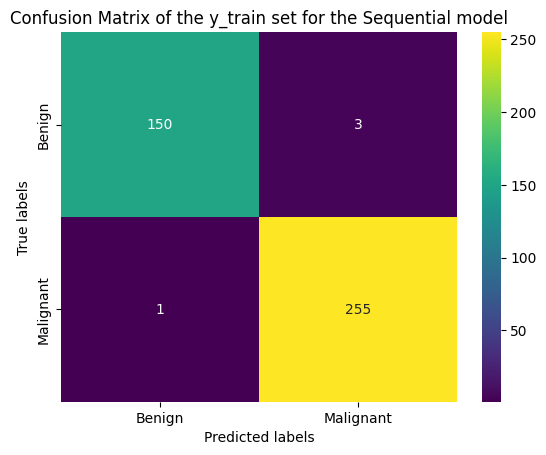

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.99      1.00      0.99       256

    accuracy                           0.99       409
   macro avg       0.99      0.99      0.99       409
weighted avg       0.99      0.99      0.99       409



In [ ]:
# Create a confusion matrix for train data, using method from sklearn.
confusion_matrix_training = confusion_matrix(y_train, y_pred_train)
# Using the function from project 1, plot the confusion matrix for train data.
plot_confusion_matrix(confusion_matrix_training, "y_train", "Sequential")
# Print the classification report for train set, using method from sklearn.
print(classification_report(y_train, y_pred_train))

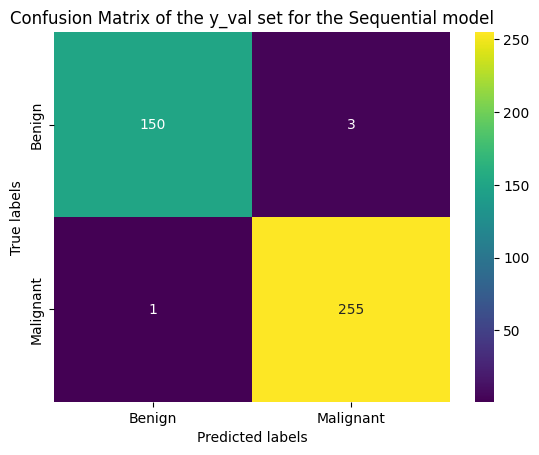

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.94      1.00      0.97        29

    accuracy                           0.96        46
   macro avg       0.97      0.94      0.95        46
weighted avg       0.96      0.96      0.96        46



In [ ]:
# Create a confusion matrix for train data, using method from sklearn.
confusion_matrix_validation = confusion_matrix(y_val, y_pred_val)
# Using the function from project 1, plot the confusion matrix for train data.
plot_confusion_matrix(confusion_matrix_training, "y_val", "Sequential")
# Print the classification report for train set, using method from sklearn.
print(classification_report(y_val, y_pred_val))

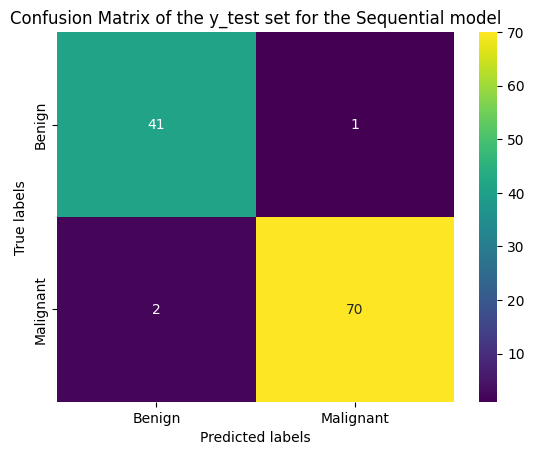

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Create a confusion matrix for test data, using method from sklearn.
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
# Using the function from project 1, plot the confusion matrix for test data.
plot_confusion_matrix(confusion_matrix_test, "y_test", "Sequential")
# Print the classification report for test set, using method from sklearn.
print(classification_report(y_test, y_pred_test))

Training Set Performance: The model has accuracy of 99%, indicating that it has learned the patterns in the training data effectively.  

Validation Set Performance: There is a decrease in performance on the validation set. This indicates that while the model is performing well, it might be overfitting the training data.

Test Set Performance: The model performs well on the test set with an accuracy of 96%. The precision, recall, and F1-scores are high, indicating that the model generalizes well to unseen data.

What can be done additionally: finetuning of hyperparameters, using Random Search